# Model Stacking

#### En esta notebook se realizará la evaluación de un model stacking con los modelos ya optimizados.

In [1]:

from utils import *


In [2]:

#Leemos el archivo que se utilizará para estos modelos.

ocasiones_num = pd.read_csv("events_num_clean.csv")


#=============================================================

#Eliminamos las columnas innecesarias.

ocasiones_num.drop(columns="Unnamed: 0", inplace = True)
ocasiones_num.drop(columns="event_type", inplace = True)
ocasiones_num.head()

,time,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation
0,2,2,6.0,2.0,0,9.0,2.0,1,1.0
1,14,1,13.0,2.0,0,15.0,1.0,1,1.0
2,17,1,4.0,1.0,1,9.0,2.0,1,1.0
3,19,1,2.0,3.0,0,15.0,1.0,0,1.0
4,20,2,2.0,3.0,0,15.0,1.0,0,1.0


In [3]:

#Aplicamos una normalización para no tener rangos numéricos tan altos.

X_norm = ocasiones_num.drop(columns=["is_goal"]).copy(deep=True)
scaler = preprocessing.MinMaxScaler()
names = X_norm.columns
d = scaler.fit_transform(X_norm)
scaled_X = pd.DataFrame(d, columns=names)
scaled_X.head()


,time,side,shot_place,shot_outcome,location,bodypart,assist_method,situation
0,0.02,1.0,0.416667,0.333333,0.375,0.5,0.25,0.0
1,0.14,0.0,1.000000,0.333333,0.750,0.0,0.25,0.0
2,0.17,0.0,0.250000,0.000000,0.375,0.5,0.25,0.0
3,0.19,0.0,0.083333,0.666667,0.750,0.0,0.00,0.0
4,0.20,1.0,0.083333,0.666667,0.750,0.0,0.00,0.0


In [4]:

#Se definen las variabes para nuestro X y nuestro objetivo

X = scaled_X
y = ocasiones_num["is_goal"].copy(deep=True)


In [5]:

# get the models to evaluate
models = get_stacked_model()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    start_time = time.perf_counter_ns()
    print('>%s %.4f (%.0f)' % (name, gmean(scores), (time.perf_counter_ns() - start_time)))
    
    

>stacking 0.6292 (217100)


<Figure size 720x720 with 0 Axes>

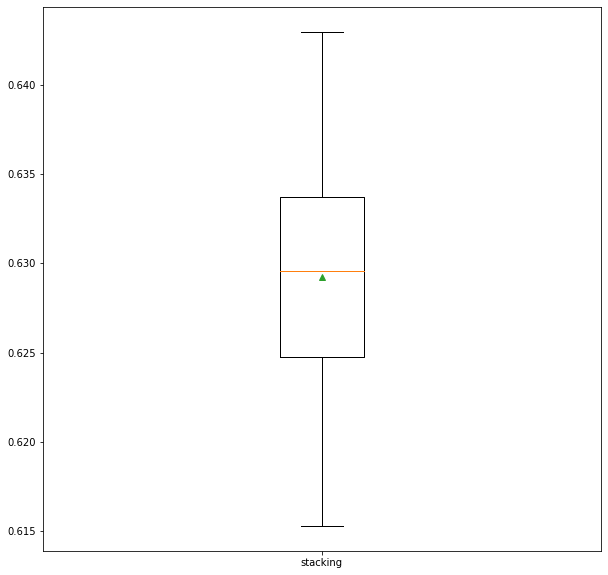

In [6]:

# plot model performance for comparison

plt.figure(figsize=(10,10))

fig, ax1 = plt.subplots(figsize=(10, 10))

bp = ax1.boxplot(results, labels=names, showmeans=True, notch=False, sym='+', vert=True, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')
plt.show()


#### El model stacking ha sido el de mejor desempeño pero también el de mayor tiempo de ejecución. 
#### Como se puede observar en el gráfico, llegó a tener un desemepeño superior al 0.64 de Recall y un rendimiento medio de 0.6292

In [7]:
# Save the model
# ==============================================================================
pkl_path = "Stacked_model.pkl"

with open(pkl_path, "wb") as f:
    # Pickle the 'Stacked' model.
    pickle.dump(model, f)